In [3]:
import os
os.chdir('C:/SS2019/Deep Vision/Ex10')


In [4]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.autograd import Variable
import torchvision.utils as vutils

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# Create the dataset
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, transform=transform, download=False)
testset = torchvision.datasets.FashionMNIST(root='./data', train=False, transform=transform, download=False)
# Create the dataloader
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128,
                                         shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=128,
                                         shuffle=True, num_workers=2)

### Task: 1

### 1(a): Implementation of a fully-connected autoencoder

In [5]:
import torch.nn as nn


def to_img(x):
    """ Maps a 2D tensor from range [-1, 1] to 4D tensor with range [0, 1].
    Useful for plotting of reconstructions.

    :param x: 2D Tensor that is supposed to be converted
    :return: Converted 4D Tensor with b, c, w, h, where w = h = 28
    """
    x = 0.5 * (x + 1)
    x = x.clamp(0, 1)
    x = x.view(x.size(0), 1, 28, 28)
    return x


def add_white_noise(x, factor=0.5, stddev=1):
    """ Adds white noise to an input tensor.
    To make sure that data is in intended range [min, max], use torch.clamp(x, min, max) after applying this function.

    :param x: ND Tensor that is altered
    :param factor: A factor that controls the strength of the additive noise
    :param stddev: The stddev of the normal distribution used for generating the noise
    :return: ND Tensor, x with white noise
    """
    # add white noise to tensor
    noise = x.clone().normal_(0, stddev)
    return x + noise * factor


class Autoencoder(nn.Module):

    def __init__(self, input_shape=(28, 28)):
        super(Autoencoder, self).__init__()
        
        self.encoder = nn.Sequential(nn.Linear(784, 128), nn.ReLU(), nn.Linear(128, 64),
        nn.ReLU(), nn.Linear(64, 32), nn.ReLU(), nn.Linear(32, 16), nn.ReLU(), 
        nn.Linear(16, 8), nn.ReLU()                                              ########## YOUR CODE HERE #############
        )
        
        self.decoder = nn.Sequential(nn.Linear(8, 16), nn.ReLU(), nn.Linear(16, 32),
        nn.ReLU(), nn.Linear(32, 64), nn.ReLU(), nn.Linear(64, 128), nn.ReLU(), 
        nn.Linear(128, 784), nn.Tanh()                                              ########## YOUR CODE HERE #############
        )

    def forward(self, x):
        x = self.encoder(x)                                                   ########## YOUR CODE HERE #############
        x = self.decoder(x)
        return x


### 1(b): Mean Squared Error to implement reconstruction error

In [6]:
distance = nn.MSELoss()
    

### 1(c): 

In [7]:
model = Autoencoder()
num_epochs = 50 
#batch_size = 128
optimizer = torch.optim.Adam(model.parameters(), weight_decay=1e-5, lr = 0.001)

#training set 
for epoch in range(num_epochs):
    for data in trainloader:
        img, _ = data
        #print(img.shape)
        #img = to_img(img)
        img = img.squeeze()
        img = img.view(-1, 784)
        img = add_white_noise(img)
        
        #img = Variable(img).cpu()
        #print(img.shape)
        #forward
        output = model(img)
        loss = distance(output, img)
        #backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    #log
    print('epoch [{}/{}], loss:{:.4f}'.format(epoch+1, num_epochs, loss))

epoch [1/50], loss:0.3935
epoch [2/50], loss:0.3675
epoch [3/50], loss:0.3570
epoch [4/50], loss:0.3444
epoch [5/50], loss:0.3388
epoch [6/50], loss:0.3466
epoch [7/50], loss:0.3304
epoch [8/50], loss:0.3350
epoch [9/50], loss:0.3373
epoch [10/50], loss:0.3308
epoch [11/50], loss:0.3353
epoch [12/50], loss:0.3294
epoch [13/50], loss:0.3305
epoch [14/50], loss:0.3307
epoch [15/50], loss:0.3279
epoch [16/50], loss:0.3208
epoch [17/50], loss:0.3276
epoch [18/50], loss:0.3252
epoch [19/50], loss:0.3280
epoch [20/50], loss:0.3310
epoch [21/50], loss:0.3258
epoch [22/50], loss:0.3293
epoch [23/50], loss:0.3283
epoch [24/50], loss:0.3178
epoch [25/50], loss:0.3253
epoch [26/50], loss:0.3182
epoch [27/50], loss:0.3267
epoch [28/50], loss:0.3198
epoch [29/50], loss:0.3196
epoch [30/50], loss:0.3150
epoch [31/50], loss:0.3272
epoch [32/50], loss:0.3243
epoch [33/50], loss:0.3259
epoch [34/50], loss:0.3275
epoch [35/50], loss:0.3260
epoch [36/50], loss:0.3158
epoch [37/50], loss:0.3248
epoch [38/

### 1(c) and 1(d)

In [36]:
import matplotlib.pyplot as plt
#test set 
img_real = []
img_fake = []
for epoch in range(num_epochs):
    for data in testloader:
        img, _ = data
        #plt.imshow(img[0].squeeze(), cmap = 'gray')
        img = torch.squeeze(img)
        img = img.view(-1, 784)
        #img = to_img(img)
        img = add_white_noise(img)
        #img = Variable(img).cpu()
        #print(img.shape)
        
        #forward
        output = model(img)
        
        loss = distance(output, img)
        
    #log
    if (epoch%10) == 0:
        #print(img[0:10].shape)
        print('epoch [{}/{}], loss:{:.4f}'.format(epoch+1, num_epochs, loss))
        x = img
        #print(x.shape)
        y = output
        #storing 10 real images from the last batch at every tenth epoch to plot later.
        img_real.append(x[0:10])
        #storing 10 fake images from the last batch at every tenth epoch to plot later.
        img_fake.append(y[0:10])
        

epoch [1/50], loss:0.3181
epoch [11/50], loss:0.3160
epoch [21/50], loss:0.3170
epoch [31/50], loss:0.3239
epoch [41/50], loss:0.3277


In [90]:
#plotting all the real images
def plot_images(epoch_num, img):   #plots real or fake images for corresponding epoch_num (0, 10, 20, 30, 40)

    for j in range (10):
        im = img[int(epoch_num/10)][j]
        im = im.reshape(28, 28)
        plt.subplot(1, 10, j+1)
        plt.imshow(im.detach().numpy(), cmap = 'gray')
    
        plt.xticks([])
        plt.yticks([])
#plt.tight_layout(pad=0.5, w_pad=10, h_pad=12)
    plt.subplots_adjust(bottom=0.1, right=1.8, top=3.0)
    plt.title('images for epoch: {}'.format(epoch_num))
    


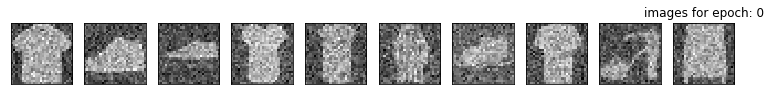

In [91]:
#Plotting real images for epoch 0
plot_images(0, img_real)


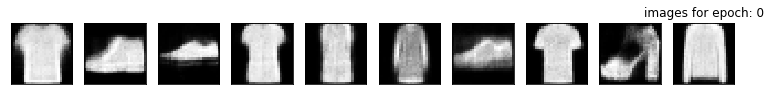

In [92]:
#Plotting fake images for epoch 0
plot_images(0, img_fake)

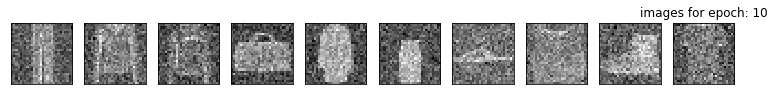

In [93]:
#Plotting real images for epoch 10
plot_images(10, img_real)

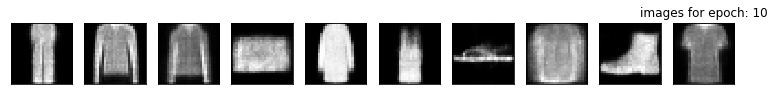

In [94]:
#Plotting fake images for epoch 10
plot_images(10, img_fake)

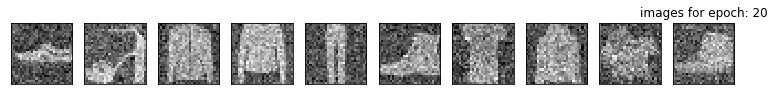

In [95]:
#Plotting real images for epoch 20
plot_images(20, img_real)

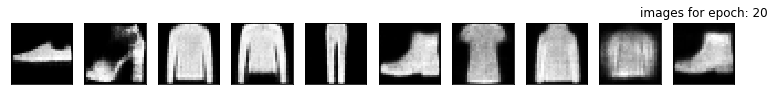

In [96]:
#Plotting fake images for epoch 20
plot_images(20, img_fake)

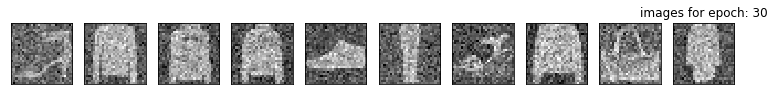

In [97]:
#Plotting real images for epoch 30
plot_images(30, img_real)

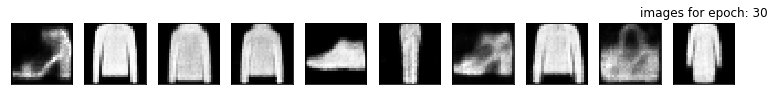

In [98]:
#Plotting reconstructed images for epoch 30
plot_images(30, img_fake)

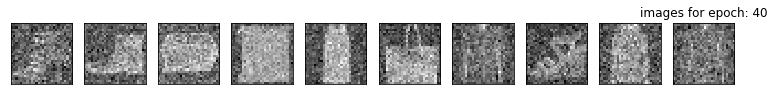

In [99]:
#Plotting real images for epoch 40
plot_images(40, img_real)

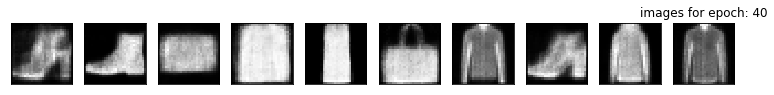

In [100]:
#Plotting reconstructed images for epoch 40
plot_images(40, img_fake)

### Task 2

In [147]:

from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.nn import functional as F
from torch.autograd import Variable


# mu and logvar: output of your encoder
def reparameterize(self, mu, logvar):
    if self.training:
        std = logvar.mul(0.5).exp_()
        eps = Variable(std.data.new(std.size()).normal_())
        return eps.mul(std).add_(mu)
    else:
        return mu

# VAE Loss
#
# recon_x: image reconstructions
# x: images
# mu and logvar: outputs of your encoder
# batch_size: batch_size
# img_size: width, respectively height of you images
# nc: number of image channels
def loss_function(recon_x, x, mu, logvar, batch_size, img_size, nc):
    MSE = F.mse_loss(recon_x, x.view(-1, img_size *  nc))

    # 0.5 * sum(1 + log(sigma^2) - mu^2 - sigma^2)
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

    # Normalize
    KLD /= batch_size * img_size *  nc

    return MSE + KLD


### 2.1

In [148]:
class VAE(nn.Module):

    def __init__(self, input_shape=(28, 28)):
        super(VAE, self).__init__()
        
        #Encoder
        self.fc1 = nn.Linear(784, 512)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(512, 256)
        self.fc31 = nn.Linear(256, 64)   #mu layer
        self.fc32 = nn.Linear(256, 64)   #logVariance layer
        
        #Decoder
        self.fc4 = nn.Linear(64, 256)
        self.fc5 = nn.Linear(256, 512)
        self.fc6 = nn.Linear(512, 784)
        self.tanh = nn.Tanh()

    def encode(self, x):
        x = self.relu(self.fc2(self.relu(self.fc1(x))))
        return self.fc31(x), self.fc32(x)
    
    def reparameterize(self, mu, logvar):
        if self.training:
            std = logvar.mul(0.5).exp_()
            eps = Variable(std.data.new(std.size()).normal_())
            return eps.mul(std).add_(mu)
        else:
            return mu
    
    def decode(self, z):
        z = self.tanh(self.fc6(self.relu(self.fc5(self.relu(self.fc4(z))))))
        return z
    
    def forward(self, x):
        mu, logvar = self.encode(x.view(-1, 784))
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar
        


In [167]:
labels_dict = {
    0: "T-shirt-top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

In [195]:
model_VAE = VAE()
num_epochs = 15 
#batch_size = 128
optimizer = torch.optim.Adam(model_VAE.parameters(), weight_decay=1e-5, lr = 0.001)


In [196]:
from torch.autograd import Variable
img_real_VAE = []
img_fake_VAE = []
#training set 
for epoch in range(num_epochs):
    for data in trainloader:
        img, _ = data
        img = Variable(img)
        #img = img.squeeze()
        #img = img.view(-1, 784)
    
        #forward
        fake, mu, logvar = model_VAE(img)
        loss = loss_function(fake, img, mu, logvar, 128, 784, 1)
        #backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    #log
    
    if (epoch == 0) or (epoch == 4) or (epoch == 9):
        #print(img[0:10].shape)
        print('epoch [{}/{}], loss:{:.4f}'.format(epoch+1, num_epochs, loss))
        
        for i in range (10):
            print(" - reconstructing: " + str(i) + labels_dict[_[i][0].item()])
        
        x = img
        #print(x.shape)
        y = fake
        #storing 10 real images from the last batch at every tenth epoch to plot later.
        img_real_VAE.append(x[0:10])
        #storing 10 fake images from the last batch at every tenth epoch to plot later.
        img_fake_VAE.append(y[0:10])
        

epoch [1/15], loss:0.1107


c:\users\verma_k\miniconda3\lib\site-packages\ipykernel_launcher.py:26: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


 - reconstructing: 0Bag
 - reconstructing: 1Sneaker
 - reconstructing: 2Sandal
 - reconstructing: 3Shirt
 - reconstructing: 4Sneaker
 - reconstructing: 5Dress
 - reconstructing: 6Pullover
 - reconstructing: 7Trouser
 - reconstructing: 8Trouser
 - reconstructing: 9Shirt
epoch [5/15], loss:0.0867
 - reconstructing: 0T-shirt-top
 - reconstructing: 1Ankle boot
 - reconstructing: 2Pullover
 - reconstructing: 3Coat
 - reconstructing: 4Dress
 - reconstructing: 5Coat
 - reconstructing: 6Trouser
 - reconstructing: 7Sneaker
 - reconstructing: 8Ankle boot
 - reconstructing: 9Coat
epoch [10/15], loss:0.0792
 - reconstructing: 0T-shirt-top
 - reconstructing: 1Sandal
 - reconstructing: 2Sandal
 - reconstructing: 3Trouser
 - reconstructing: 4Trouser
 - reconstructing: 5Shirt
 - reconstructing: 6Sandal
 - reconstructing: 7Ankle boot
 - reconstructing: 8Coat
 - reconstructing: 9Ankle boot


In [222]:
#plotting all the real images
def plot_images_VAE(epoch_num, img):   #plots real or fake images for corresponding epoch_num (0, 4, 9)

    for j in range (10):
        im = img[int(np.sqrt(epoch_num) - 1)][j]
        #im = img[2][j]
        im = im.reshape(28, 28)
        plt.subplot(1, 10, j+1)
        plt.imshow(im.detach().numpy(), cmap = 'gray')
    
        plt.xticks([])
        plt.yticks([])
#plt.tight_layout(pad=0.5, w_pad=10, h_pad=12)
    plt.subplots_adjust(bottom=0.1, right=1.8, top=3.0)
    plt.title('images for epoch: {}'.format(epoch_num))
    

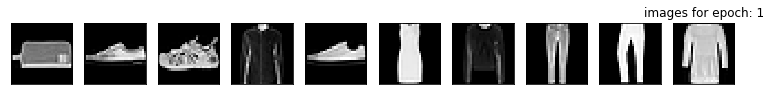

In [212]:
#Plotting real images for epoch 0
plot_images_VAE(1, img_real_VAE)

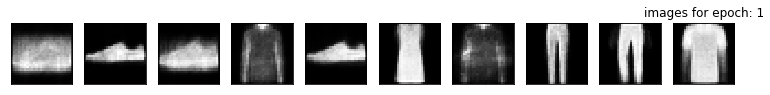

In [213]:
#Plotting fake/generated images for epoch 0
plot_images_VAE(1, img_fake_VAE)

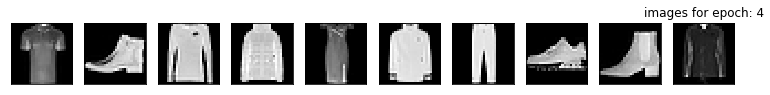

In [224]:
#Plotting real images for epoch 5
plot_images_VAE(4, img_real_VAE)

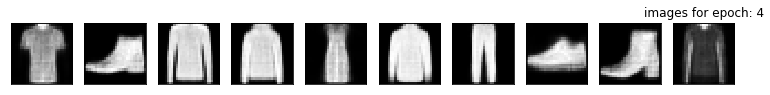

In [225]:
#Plotting fake images for epoch 5
plot_images_VAE(4, img_fake_VAE)

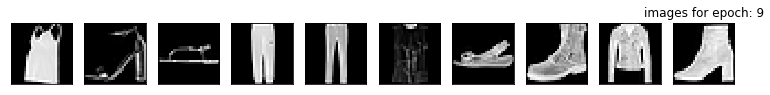

In [226]:
#Plotting real images for epoch 10
plot_images_VAE(9, img_real_VAE)

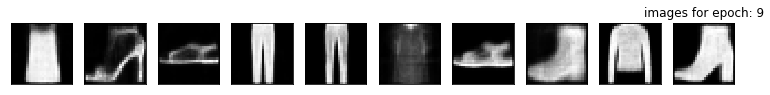

In [227]:
#Plotting fake images for epoch 10
plot_images_VAE(9, img_fake_VAE)

### 2.2

In [271]:
mean = []
labels = []
FAKE = []
batch = 0
for data in testloader:
        batch += 1                          
        img, label = data
        img = Variable(img)
        fake, mu, logvar = model_VAE(img)
        mean.append(mu)                        #appending all the 64-dimensional means(features!)
        FAKE.append(fake)                      #appending the generated images grom the above features
        labels.append(label)                   #appending their corresponding labels

In [273]:
batch    #79 batches hence, to extract around 400 images, consider the generated images in the first three batches

79

In [291]:
print(FAKE[0].shape)
print(labels[0].shape)
print(img.shape)

torch.Size([128, 784])
torch.Size([128])
torch.Size([16, 1, 28, 28])


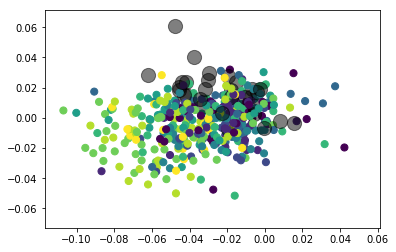

In [351]:
from sklearn.cluster import KMeans
x1 = mean[0]     #mean(features) of first image batch
x2 = mean[1]     #mean(features) of second image batch
x3 = mean[3]     #mean(features) of fourth image batch
#x = x1 + x2
kmeans1 = KMeans(n_clusters=10, random_state=0).fit(x1.detach().numpy())  #Kmeans clustering of extracted features of first batch
y_kmeans = kmeans1.predict(x2.detach().numpy())
y_true1 = labels[0]   #true labels of the first batch

kmeans2 = KMeans(n_clusters=10, random_state=0).fit(x2.detach().numpy())  #Kmeans clustering of extracted features of second batch
y_kmeans = kmeans2.predict(x2.detach().numpy())
y_true2 = labels[1]   #true labels of the second batch

kmeans3 = KMeans(n_clusters=10, random_state=0).fit(x3.detach().numpy())  #Kmeans clustering of extracted features of fourth batch
y_kmeans = kmeans3.predict(x3.detach().numpy())
y_true3 = labels[3]  #true labels of the fourth batch

plt.scatter(x1[:, 4].detach().numpy(), x1[:, 9].detach().numpy(), c=y_true1, s=50, cmap='viridis')  #plotting by only taking 2 dimensions of 20-dimensional feature vector.
centers1 = kmeans1.cluster_centers_   #cluster centers
plt.scatter(centers1[:, 0], centers1[:, 1], c='black', s=200, alpha=0.5);

plt.scatter(x2[:, 4].detach().numpy(), x2[:, 9].detach().numpy(), c=y_true2, s=50, cmap='viridis')
centers2 = kmeans2.cluster_centers_
plt.scatter(centers2[:, 0], centers2[:, 1], c='black', s=200, alpha=0.5);

plt.scatter(x3[:, 4].detach().numpy(), x3[:, 9].detach().numpy(), c=y_true2, s=50, cmap='viridis')
centers3 = kmeans3.cluster_centers_
plt.scatter(centers3[:, 0], centers3[:, 1], c='black', s=200, alpha=0.5);



In [440]:
def plot_fake(batch_no):
    #real_batch = next(iter(dataloader))
    batch = FAKE[batch_no]
    #print(batch[0].shape)
    batch = batch.view(-1, 28, 28)
    batch = batch.detach().cpu()
    
    # Plot the fake images from the given batch number
    for i in range(128):
        plt.subplot(16, 8, i+1)
        plt.imshow(batch[i].detach().numpy(), cmap = 'gray')
        plt.xticks([])
        plt.yticks([])
#plt.tight_layout(pad=0.5, w_pad=10, h_pad=12)
    plt.subplots_adjust(bottom=0.1, right=1.8, top=3.0, wspace = -0.85, hspace = 0)
   

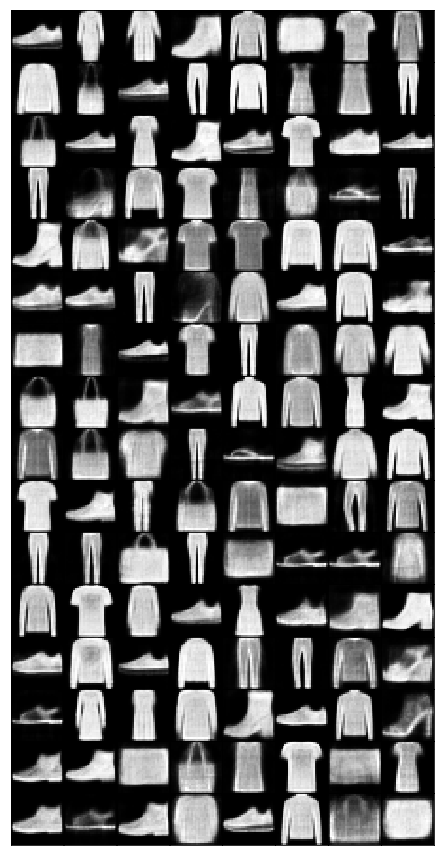

In [443]:
plot_fake(0)


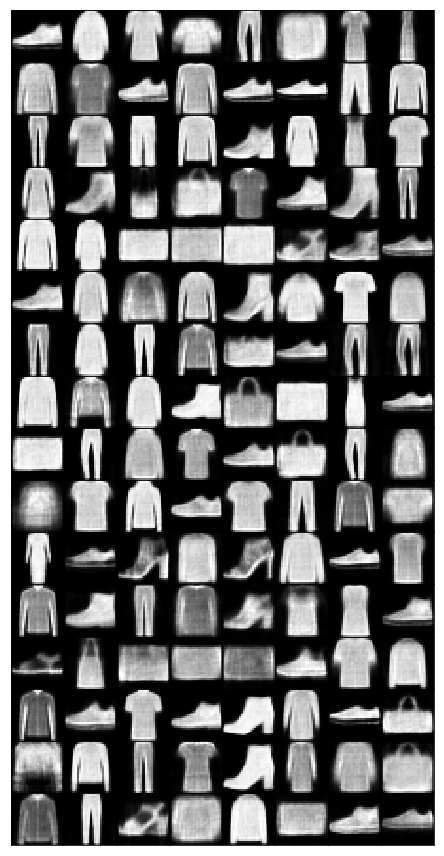

In [444]:
plot_fake(1)

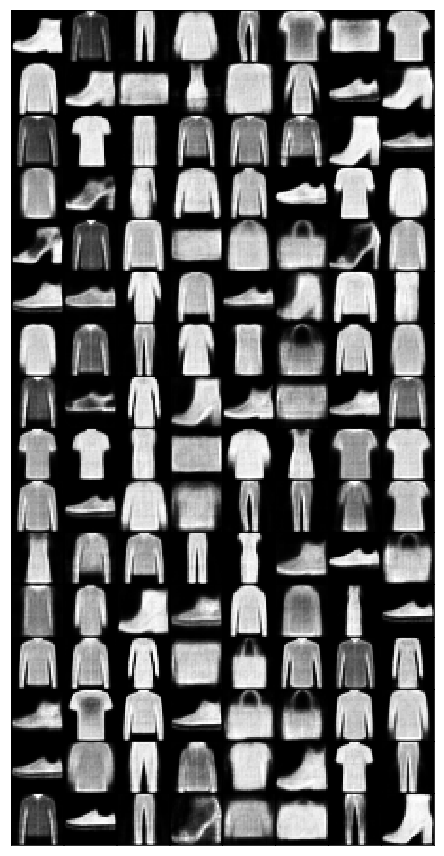

In [445]:
plot_fake(3)

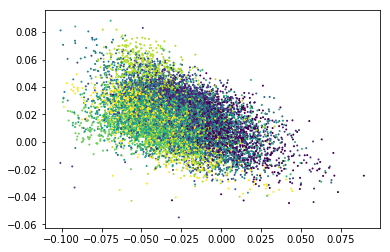

In [257]:
#plotting just the two dimensions of feature vectors of 100 batches
fig = plt.figure()
ax1 = fig.add_subplot(111)
for i in range (100):
    ax1.scatter(mean[i][:,0].detach().numpy(), mean[i][:,1].detach().numpy(), s=1, c=labels[i])
    #ax1.scatter(mean[1][:,0].detach().numpy(), mean[1][:,1].detach().numpy(), s=80, c=labels[1])
#plt.legend(loc='upper left');
plt.show()

In [336]:

from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.nn import functional as F
from torch.autograd import Variable

# Manifold approximation using tSNE
#
# features: (numpy array) N x D feature matrix
# images: (numpy array) N x H x W x 3
# path_save: string (path where you want to save the final image)
def apply_tnse_img(features, images, path_save='./tsne_img.png'):
    
    images = images.view(-1, 28, 28)
    tnse = TSNE(n_components=2, init='pca', n_iter=1000, random_state=1254, perplexity=30, metric='euclidean')
    # np.set_printoptions(False)
    vis_data = tnse.fit_transform(features.detach().numpy())
    vis_x = vis_data[:, 0]
    #print(vis_x)
    vis_y = vis_data[:, 1]
    #print(vis_y)

    # get max heigth, width
    
    max_width = max([image.shape[0] for image in images])
    max_height = max([image.shape[1] for image in images])
    
    # get max, min coords
    x_min, x_max = vis_x.min(), vis_x.max()
    y_min, y_max = vis_y.min(), vis_y.max()

    # Fix the ratios
    res = 700
    sx = (x_max - x_min)
    sy = (y_max - y_min)
    if sx > sy:
        res_x = int(sx / float(sy) * res)
        res_y = res
    else:
        res_x = res
        res_y = int(sy / float(sx) * res)

    # impaint images
    canvas = np.ones((res_x + max_width, res_y + max_height, 3))
    x_coords = np.linspace(x_min, x_max, res_x)
    y_coords = np.linspace(y_min, y_max, res_y)
    for x, y, image in zip(vis_x, vis_y, images):
        w, h = image.shape[:2]
        x_idx = np.argmin((x - x_coords) ** 2)
        y_idx = np.argmin((y - y_coords) ** 2)
        try:
            canvas[x_idx:x_idx + w, y_idx:y_idx + h] = image
        except:
            print('Image out of borders.... skip!')

    # plot image
    fig = plt.figure()
    plt.imshow(canvas)

    mng = plt.get_current_fig_manager()
    mng.full_screen_toggle()
    plt.show(False)
    plt.pause(3)
    fig.savefig(path_save, bbox_inches='tight')



Image out of borders.... skip!
Image out of borders.... skip!
Image out of borders.... skip!
Image out of borders.... skip!
Image out of borders.... skip!
Image out of borders.... skip!
Image out of borders.... skip!
Image out of borders.... skip!
Image out of borders.... skip!
Image out of borders.... skip!
Image out of borders.... skip!
Image out of borders.... skip!
Image out of borders.... skip!
Image out of borders.... skip!
Image out of borders.... skip!
Image out of borders.... skip!
Image out of borders.... skip!
Image out of borders.... skip!
Image out of borders.... skip!
Image out of borders.... skip!
Image out of borders.... skip!
Image out of borders.... skip!
Image out of borders.... skip!
Image out of borders.... skip!
Image out of borders.... skip!
Image out of borders.... skip!
Image out of borders.... skip!
Image out of borders.... skip!
Image out of borders.... skip!
Image out of borders.... skip!
Image out of borders.... skip!
Image out of borders.... skip!
Image ou

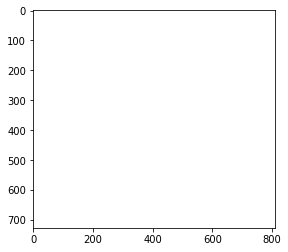

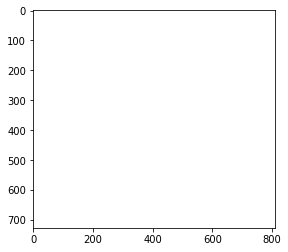

In [337]:
apply_tnse_img(mean[1], FAKE[1], path_save='./tsne_img.png')    #128 mean values and 128 fake images

### 2.3

Using the output of encoder network as input, the decoder network can generate an image quite like an old image. Therefore, one can say that the output of encoder network has pretty much covered most of the information in the original image. The extracted features are the most important features of the original image that distinguish it from other images. As per the graph, the K-means cluster centres coincide with each other, within this space new (unseen) images are generated, combining features from various original images. The images thus generated have also been plotted. 